# DESARROLLO CASO PRACTICO 3
##### Utilice el dataset del Titanic dado por la librería seaborn que contiene 15 columnas y 891 registros, el cual se trabajó en la unidad 1 realizando un preprocesamiento de datos y un análisis exploratorio de datos. Se pretende predecir la supervivencia de un pasajero en el naufragio del Titanic (sobrevivió=1, no sobrevivió=0) utilizando los algoritmos de clasificación revisados en la unidad 2, así como realizar la evaluación del rendimiento de los algoritmos usando las métricas y gráficas respectivas.

###  Analisis de Datos- Universidad de los Hemisferios
#### Maestría en Inteligencia Artificial Aplicada
#### Integrantes : Victoria Fárez | Wilfrido Almache | Christian Iza | Ruben Tocain

### 1. Importación de Librerías

In [21]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

import joblib

### 2. Carga de dataset y revisión preliminar

In [2]:
# Cargar el dataset del Titanic desde seaborn
df = sns.load_dataset('titanic')

# Mostrar las primeras filas del DataFrame
print("\n========== Primeras Filas ====================\n")
print(df.head())

# Información general sobre los datos
print("\n========== Información General ====================\n")
print(df.info())

# Identificar valores nulos
print("\n========== Identificar NULLs ====================\n")
print(df.isnull().sum())

#Columnas en dataset original
print("\n========== Columnas en dataset original ====================\n")
print(df.columns)


========== Primeras Filas ====================

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

========== Información General ====================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column

### 3. EDA


========== Columnas en dataset 2 ====================

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
(891, 15)

========== Estadísticas Descriptivas ====================

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.00

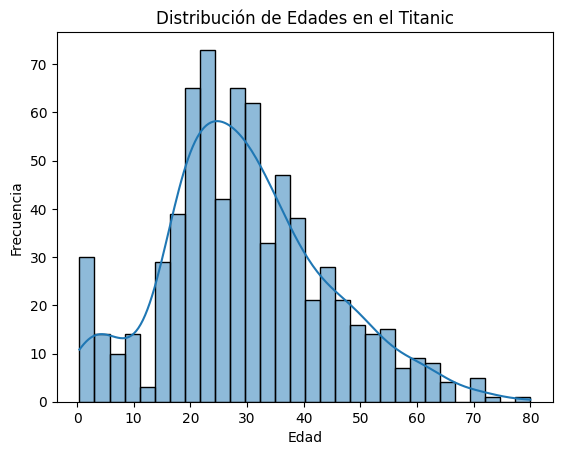

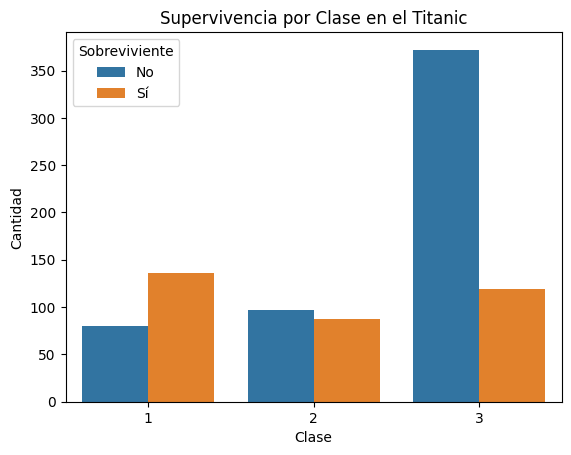

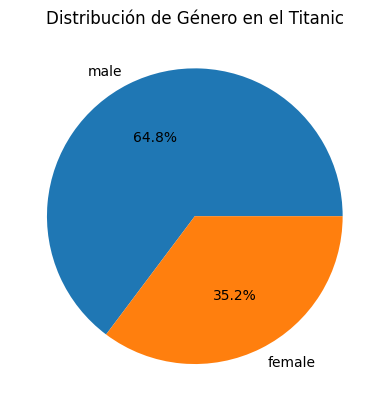

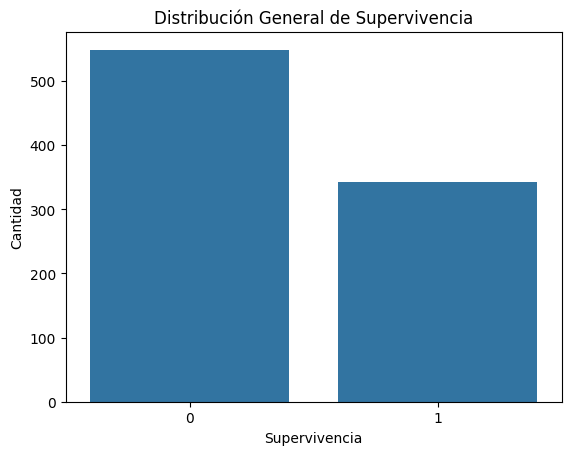

In [3]:

#Columnas en dataset original
print("\n========== Columnas en dataset 2 ====================\n")
print(df.columns)
print(df.shape)

# Estadísticas descriptivas
print("\n========== Estadísticas Descriptivas ====================\n")
print(df.describe())

# Estadísticas de variables categóricas
print("\n========== Columnas de variables Categóricas ====================\n")
print(df.describe(include=['object']))

# Histogramas de Edades:
sns.histplot(df['age'].dropna(), bins=30, kde=True)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades en el Titanic')
plt.show()

# Gráfico de Barras de Supervivencia por Clase:
sns.countplot(data=df, x='pclass', hue='survived')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.title('Supervivencia por Clase en el Titanic')
plt.legend(title='Sobreviviente', labels=['No', 'Sí'])
plt.show()

# Gráfico de Torta de Género:
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de Género en el Titanic')
plt.ylabel('')
plt.show()

# Gráfico de Distribución de Supervivencia General:
sns.countplot(x='survived', data=df)
plt.xlabel('Supervivencia')
plt.ylabel('Cantidad')
plt.title('Distribución General de Supervivencia')
##plt.legend(title='Sobreviviente', labels=['No', 'Sí'])
plt.show()

### 3.1. Correlación


========== Correlación de características más importantes ==========




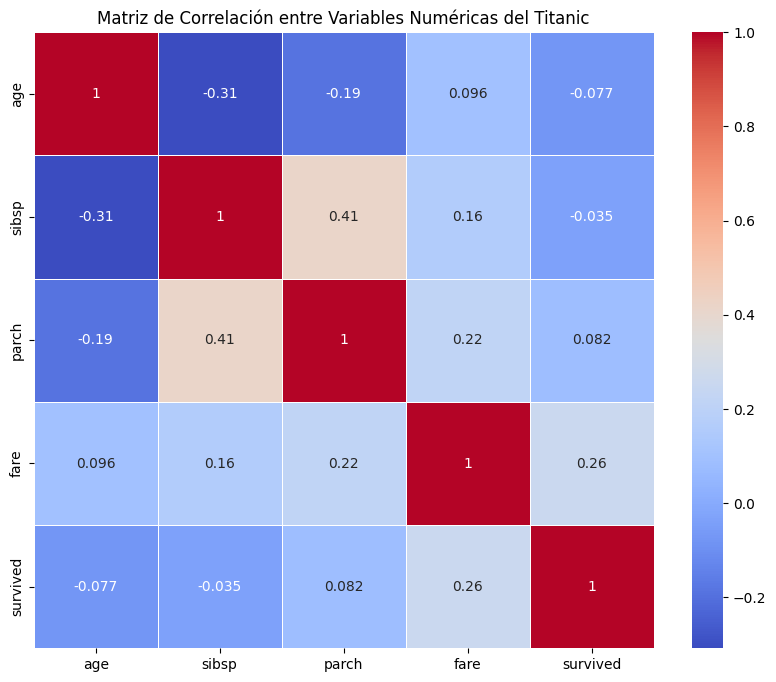


========== Correlaciones moderadas/altas mayores a 0.4 ==========



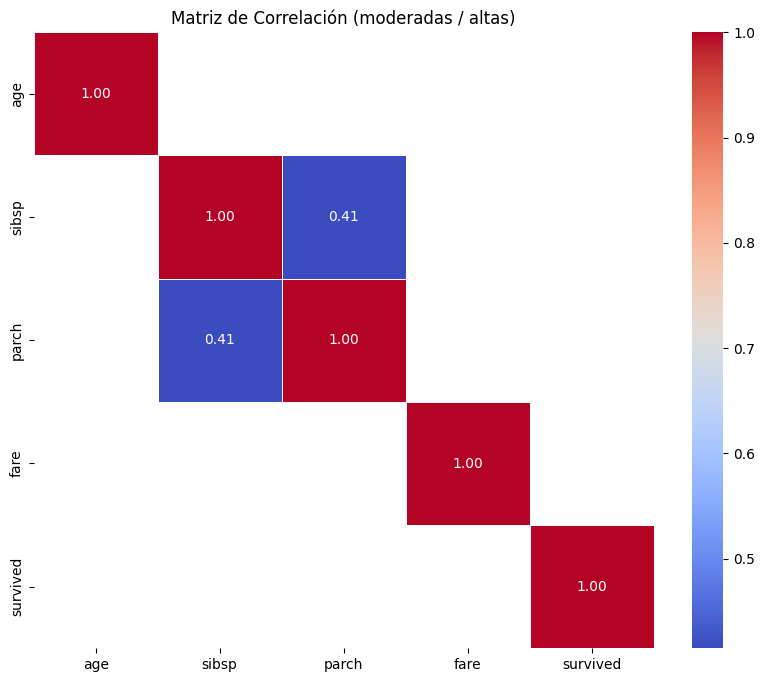

In [4]:
# Análisis de Correlación
# Se eliminan aquellas variables que tengan una correlación baja o nula con la variable objetivo, 
# ya que podrían no aportar información relevante al modelo.
# Además, se podría quitar ciertas variables que están altamente correlacionadas entre sí.
# Determinación de las características más importantes para el análisis de correlación y el target
##variables_numericas = ['age', 'sibsp', 'parch', 'fare', 'survived']
df = df[['age', 'sibsp', 'parch', 'fare', 'survived']]

print("\n========== Correlación de características más importantes ==========\n")
print()
# Crear una submatriz de correlación
#correlation_matrix = df[variables_numericas].corr()
correlation_matrix = df.corr()

# Crear un mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación entre Variables Numéricas del Titanic')
plt.show()

print("\n========== Correlaciones moderadas/altas mayores a 0.4 ==========\n")
# Aplicar una máscara para mostrar solo correlaciones moderadas/altas mayores a 0.4
mask = np.abs(correlation_matrix) < 0.4
correlation_matrix[mask] = np.nan
# Crear un mapa de calor de correlación con valores significativos
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación (moderadas / altas)')
plt.show()

### 3.2. Diagrama de cajas y bigotes de las variables mas relevantes

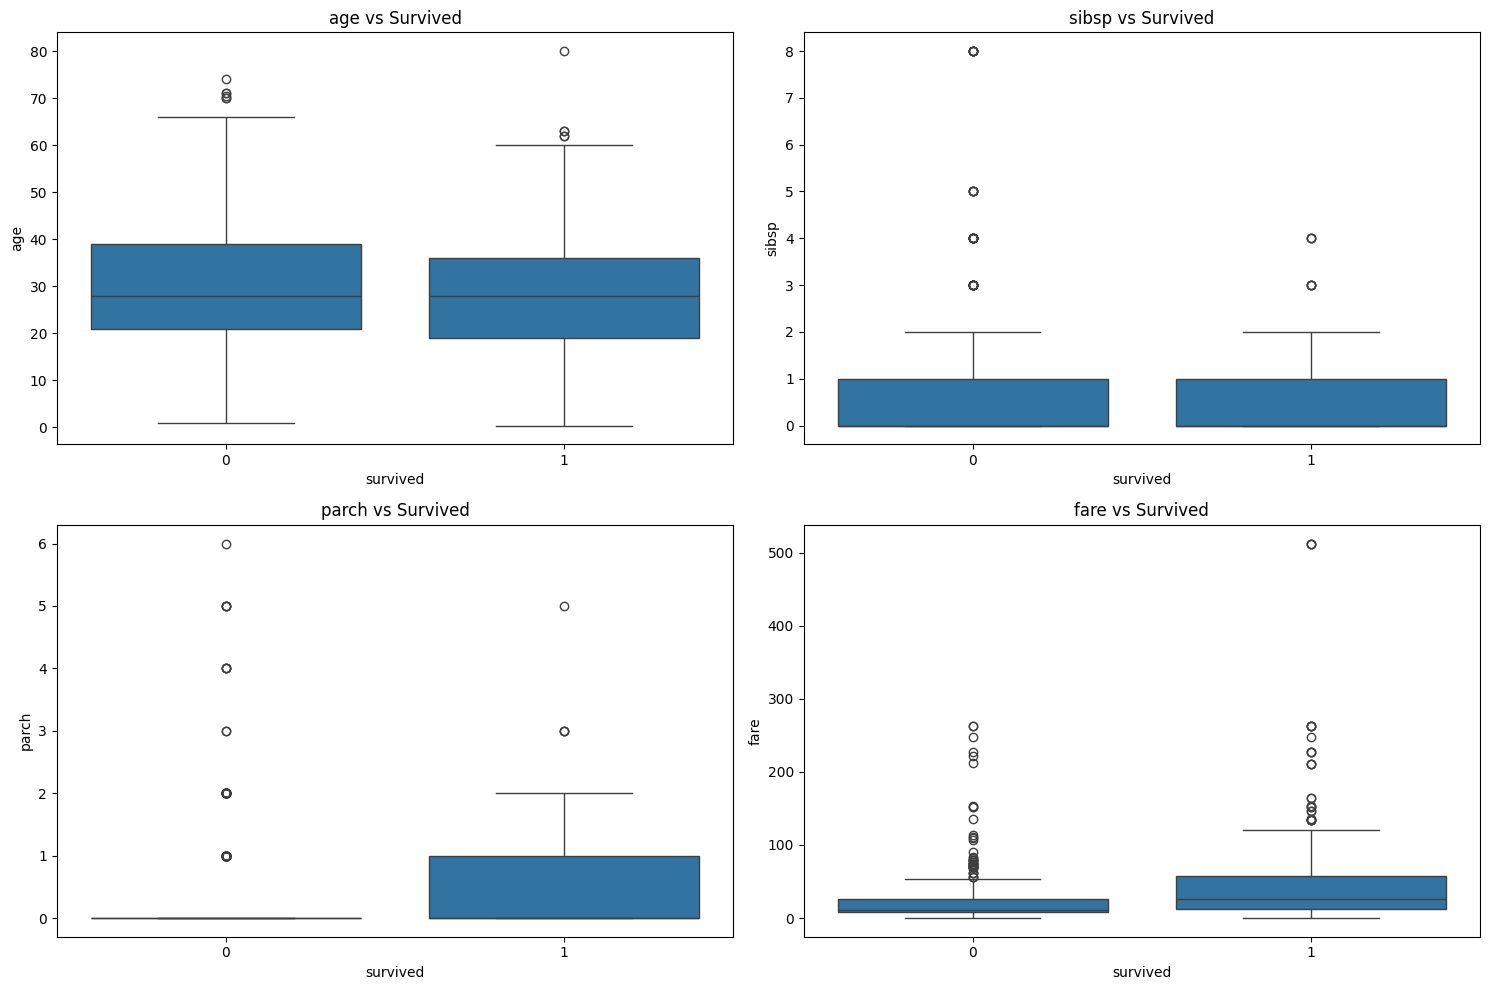

In [5]:
# Seleccionar variables relevantes para visualización
features = ['age', 'sibsp', 'parch', 'fare']

# Crear figura
plt.figure(figsize=(15, 10))

# Iterar sobre las características y generar gráficos de caja y bigotes
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)  # 2 filas y 2 columnas de subgráficos
    sns.boxplot(x='survived', y=feature, data=df)
    plt.title(f'{feature} vs Survived')

plt.tight_layout()
plt.show()
plt.close()

### 3.3. Quitar valores atípicos

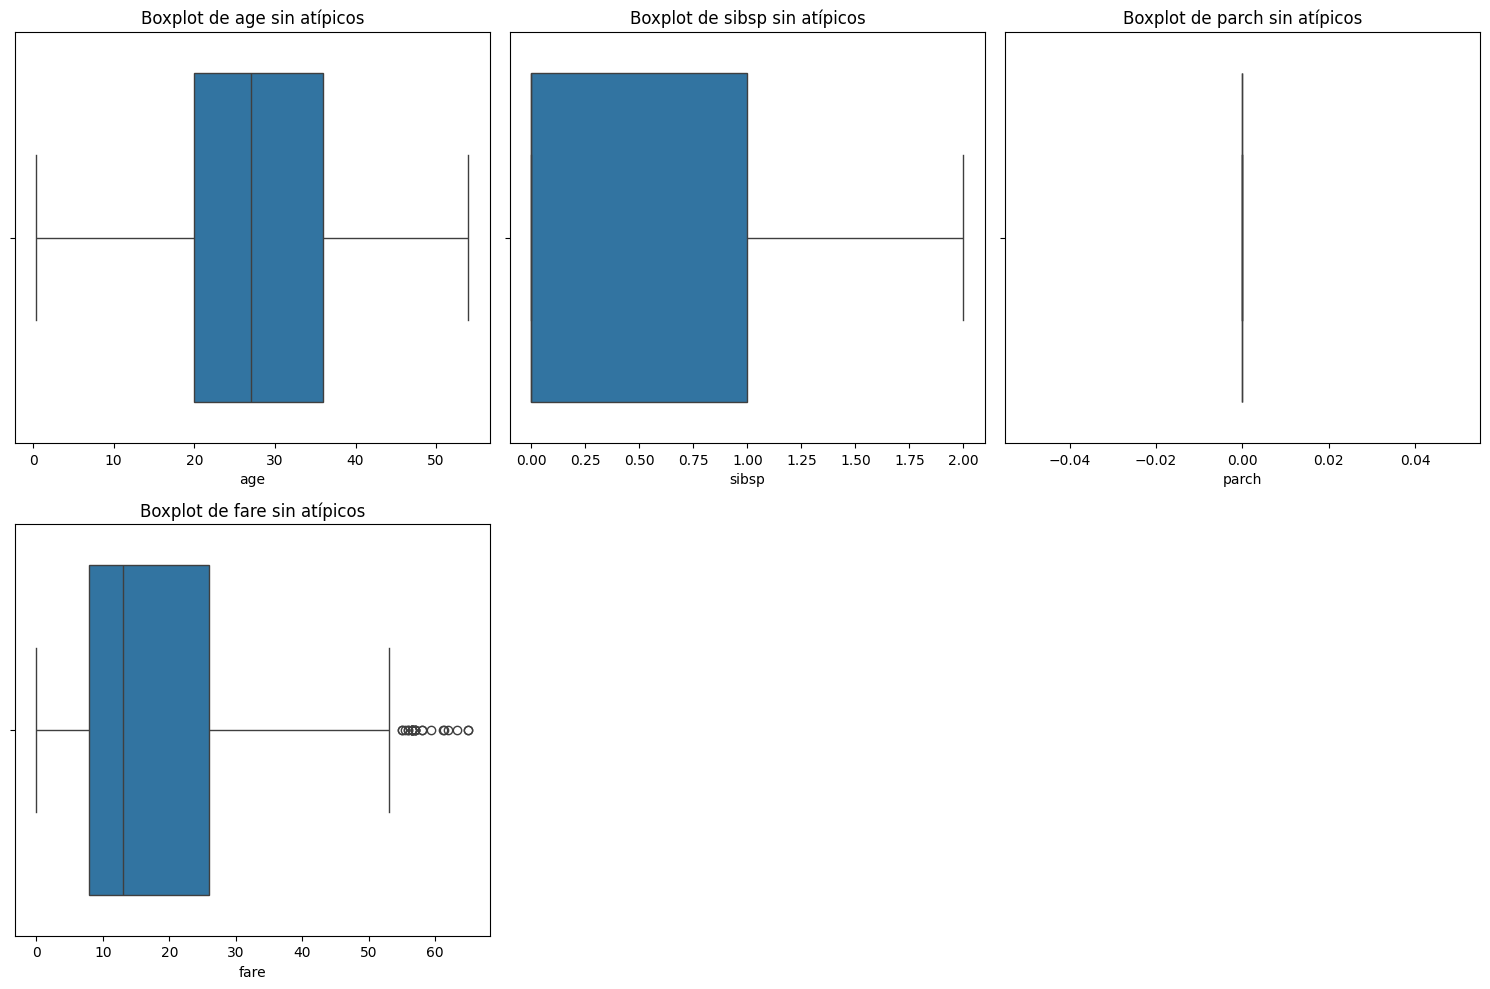

In [6]:
#Definición de factores para limites superior e inferior
#limits = {feature: [1.5, 1.5] for feature in features}

limits = {
    'age': [0.9,1.5],
    'sibsp': [1.5, 1.5],
    'parch': [1.5, 1.5],
    'fare': [1.5, 1.5],
}
#Espacio para los boxplot
plt.figure(figsize=(15, 10))
# Iterar sobre cada característica y aplicar los límites
for i, (key, values) in enumerate(limits.items(), 1):
    Q1 = df[key].quantile(0.25)
    Q3 = df[key].quantile(0.75)
    IQR = Q3 - Q1  # rango intercuartil
    limite_superior = Q3 + values[0] * IQR
    limite_inferior = Q1 - values[1] * IQR
    # Filtrar los datos para quitar los valores atípicos
    filtered_df = df[(df[key] >= limite_inferior) & (df[key] <= limite_superior)]
    # Crear el boxplot
    plt.subplot(2, 3, i)
    sns.boxplot(x=filtered_df[key])
    plt.title(f'Boxplot de {key} sin atípicos')
    plt.xlabel(key)
plt.tight_layout()
plt.show()
plt.close()

### 4. Preparación de los datos para el modelo

In [7]:
# Revisar los valores nulos
print("\n========== Valores nulos en características más relevantes ==========\n")
print(df.isnull().sum())

# Imputar valores faltantes
imputer = SimpleImputer(strategy='median')
df['age'] = imputer.fit_transform(df[['age']])

print("\n========== Valores nulos en características más relevantes ==========\n")
print(df.isnull().sum())

# Separar las características (features) y la variable objetivo (target)
X = df.drop('survived', axis=1)
y = df['survived']


========== Valores nulos en características más relevantes ==========

age         177
sibsp         0
parch         0
fare          0
survived      0
dtype: int64

========== Valores nulos en características más relevantes ==========

age         0
sibsp       0
parch       0
fare        0
survived    0
dtype: int64


### 5. Algoritmos de clasificación

#### 5.1. Regresión Logística

##### 5.1.1. Dividir datos en entramiento y prueba

In [8]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### 5.1.2. Crear y entrenar modelo

In [12]:
# Crea y entrena el modelo de regresión logistica
model = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=100)
model.fit(X_train, y_train)

/home/walmache/MEGA/autoCapacitacion/Maestria-IA/gitHub/MaestriaIA-UHE/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='auto')

In [13]:
# Imprime los coeficientes y el intercepto del modelo entrenado
print("\n========== Coeficientes del modelo ====================\n")
print(model.coef_)
print("\n========== Intercepto del modelo ====================\n")
print(model.intercept_)


========== Coeficientes del modelo ====================

[[-0.24046615 -0.35638072  0.10500039  0.82951084]]

========== Intercepto del modelo ====================

[-0.48429428]


##### 5.1.3. Predicciones

In [14]:
# Realiza predicciones usando el conjunto de prueba
y_pred = model.predict(X_test)

##### 5.1.4. Probabilidades a etiquetas binarias

In [15]:
# Convierte las probabilidades en etiquetas binarias (0 o 1)
y_pred = (y_pred > 0.5)

##### 5.1.5. Informe de Evaluación de modelo entrenado

In [22]:
# Muestra el informe de evaluación del modelo entrenado
print("\n========== Informe de evaluación del modelo entrenado ====================\n")
print(classification_report(y_test, y_pred))


========== Informe de evaluación del modelo entrenado ====================

              precision    recall  f1-score   support

           0       0.66      0.94      0.78       105
           1       0.79      0.31      0.45        74

    accuracy                           0.68       179
   macro avg       0.73      0.63      0.61       179
weighted avg       0.72      0.68      0.64       179



##### 5.1.6. Matriz de Confusión


=========== Matriz de Confusión ==========
 [[99  6]
 [51 23]]


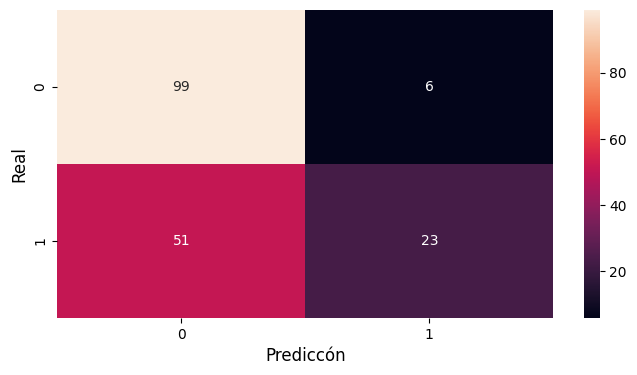

In [23]:
cm = confusion_matrix(y_test, y_pred)
print("\n=========== Matriz de Confusión ==========\n", cm)
# gráfica cm
plt.figure(figsize = (8,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediccón', fontsize = 12)
plt.ylabel('Real', fontsize = 12)
plt.show()

##### 5.1.7. Métricas del modelo

accuracy:  0.6815642458100558
recall:  0.3108108108108108
precision:  0.7931034482758621
specificity:  0.9428571428571428
f1 score:  0.44660194174757284
auc:  0.6268339768339768


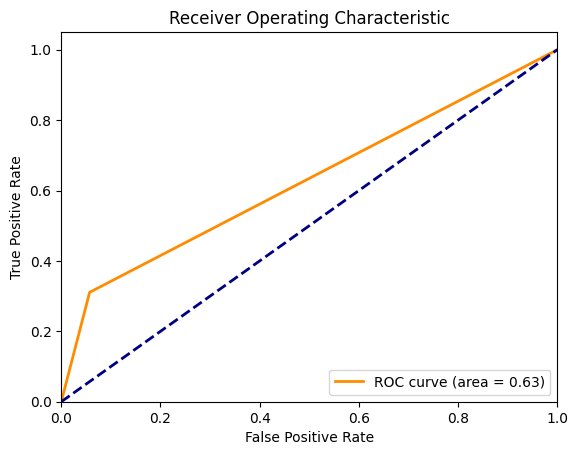

R2:  -0.3131274131274131


In [24]:
# Exactitud:
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)

# Sensibilidad:
recall = recall_score(y_test, y_pred)
print("recall: ", recall)

# Precisión:
precision = precision_score(y_test, y_pred)
print("precision: ", precision)

# Especificidad
# 'specificity' is just a special case of 'recall'.
# specificity is the recall of the negative class
specificity = recall_score(y_test, y_pred, pos_label=0)
print("specificity: ", specificity)

# Puntuación F1:
f1 = f1_score(y_test, y_pred)
print("f1 score: ", f1)

# Área bajo la curva:
auc = roc_auc_score(y_test, y_pred)
print("auc: ", auc)

# Curva ROC
plt.figure()
lw = 2
plt.plot(roc_curve(y_test, y_pred)[0], roc_curve(y_test, y_pred)[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' %auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# R Score (R^2 coefficient of determination)
R = r2_score(y_test, y_pred)
print("R2: ", R)

##### 5.1.8. Visualizar importancia de las características

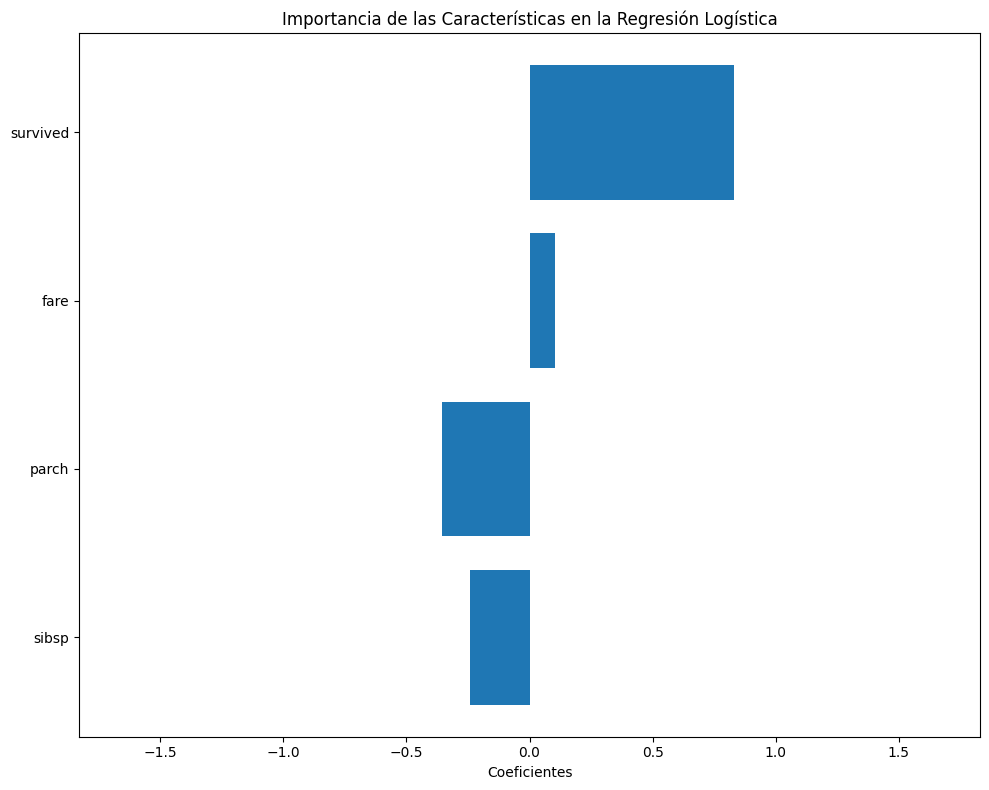

In [25]:
# Visualizar la importancia de las características
feature_names = df.columns[1:]
coefficients = model.coef_
# Configurar el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 8))

# Crear un gráfico de barras horizontal
ax.barh(feature_names, coefficients[0])
ax.set_title('Importancia de las Características en la Regresión Logística')
ax.set_xlabel('Coeficientes')
ax.set_xlim(-max(abs(coefficients[0]))-1, max(abs(coefficients[0]))+1)

plt.tight_layout()
plt.show()

##### 5.1.9. Guardar Modelo

In [26]:
# Guardar el modelo a un archivo
joblib.dump(model, 'titanic-LR.pkl')
# Cargar el modelo desde el archivo
loaded_model = joblib.load('titanic-LR.pkl')
# Hacer predicciones con el modelo cargado
y_pred = model.predict(X_test)

### 6. Mejora resultados Regresión Logistica

In [27]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score, 
                             confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay)
import matplotlib.pyplot as plt

#### 6.1. Preparación Data

In [28]:
# Cargar el dfset del Titanic desde seaborn
df = sns.load_dataset('titanic')

# Preprocesamiento de datos
# Eliminar columnas irrelevantes
df.drop(columns=['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male'], inplace=True)

# Rellenar valores nulos
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)

# Codificar variables categóricas
df = pd.get_dummies(df, drop_first=True)

# Separar características y variable objetivo
X = df.drop(columns=['survived'])
y = df['survived']

/tmp/ipykernel_148311/1431344846.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipykernel_148311/1431344846.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

#### 6.2. División datos entrenamiento y pruebas

In [29]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Selección de características con RFE
model = LogisticRegression(max_iter=1000)
selector = RFE(model, n_features_to_select=10)
selector = selector.fit(X_train, y_train)

# Características seleccionadas
selected_features = X_train.columns[selector.support_]
print(f'Caracter+isticas Seleccionadas: {selected_features}')

# Transformar los conjuntos de datos
X_train_selected = pd.DataFrame(selector.transform(X_train), columns=selected_features)
X_test_selected = pd.DataFrame(selector.transform(X_test), columns=selected_features)

Caracter+isticas Seleccionadas: Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'alone', 'sex_male',
       'embarked_Q', 'embarked_S'],
      dtype='object')


/home/walmache/MEGA/autoCapacitacion/Maestria-IA/gitHub/MaestriaIA-UHE/.venv/lib/python3.10/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=10 > n_features=9. There will be no feature selection and all features will be kept.
  warnings.warn(


#### 6.3 Seleccionar mejor modelo

In [30]:
# Ajuste de hiperparámetros con GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_selected, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_
print(f'Mejores Parameteros: {grid_search.best_params_}')

# Balanceo de datos con SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_selected, y_train)

# Entrenar el mejor modelo con los datos balanceados
best_model.fit(X_train_balanced, y_train_balanced)


Mejores Parameteros: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


LogisticRegression(C=1, max_iter=1000, solver='liblinear')

#### 6.4. Predicciones

In [31]:
# Realizar predicciones
y_pred = best_model.predict(X_test_selected)
y_pred_prob = best_model.predict_proba(X_test_selected)[:, 1]

#### 6.5 Metricas varias

Accuracy: 0.7932960893854749
Recall: 0.7432432432432432
Precision: 0.7534246575342466
F1 Score: 0.7482993197278912
Specificity: 0.8285714285714286
AUC: 0.8837837837837836


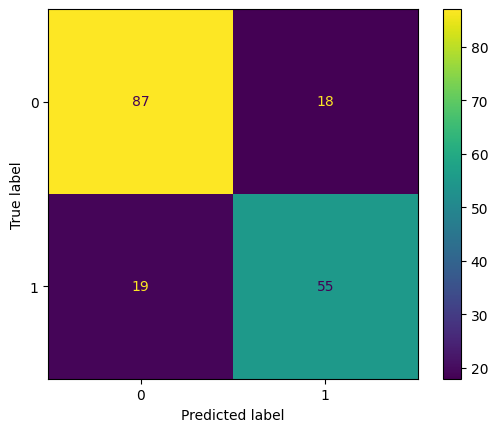

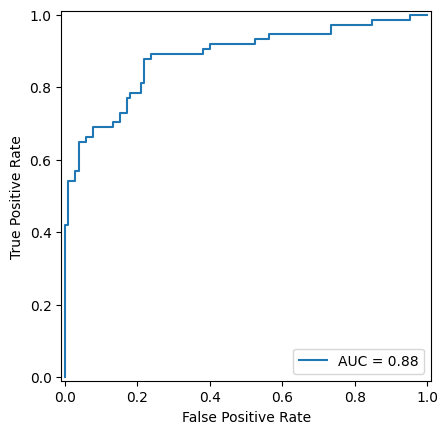

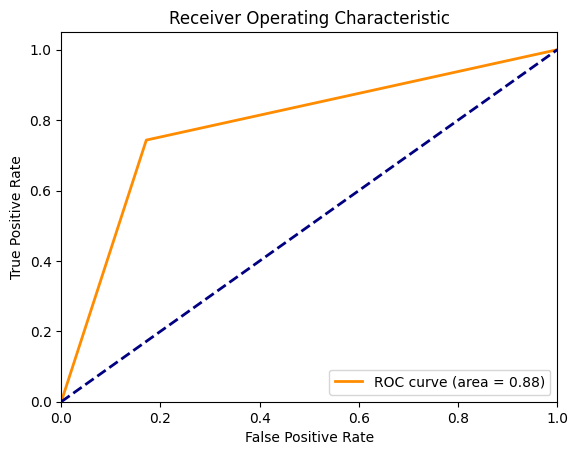

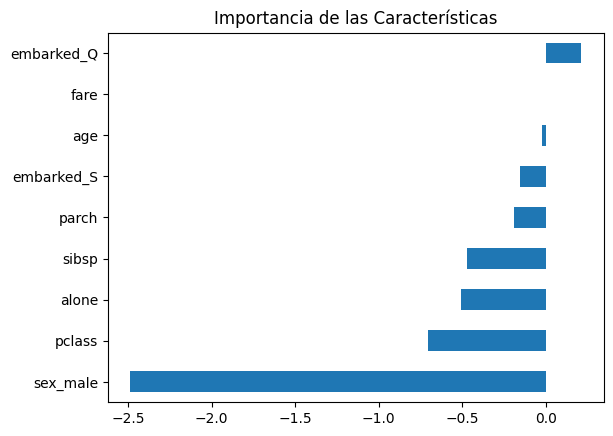

In [32]:
# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Especificidad
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Calcular AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Imprimir métricas
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print(f'Specificity: {specificity}')
print(f'AUC: {roc_auc}')

# Graficar matriz de confusión
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

# Graficar curva ROC
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.show()
# Curva ROC
plt.figure()
lw = 2
plt.plot(roc_curve(y_test, y_pred)[0], roc_curve(y_test, y_pred)[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Importancia de las características
importancia_caracteristicas = pd.Series(best_model.coef_[0], index=selected_features)
importancia_caracteristicas.sort_values().plot(kind='barh')
plt.title('Importancia de las Características')
plt.show()

# Guardar el modelo a un archivo
joblib.dump(best_model, 'titanic-LR_BM.pkl')
# Cargar el modelo desde el archivo
loaded_model = joblib.load('titanic-LR_BM.pkl')
# Hacer predicciones con el modelo cargado
y_pred = best_model.predict(X_test)